In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
df = pd.read_csv("advertising.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


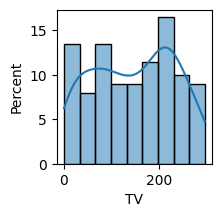

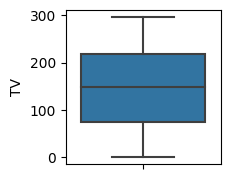

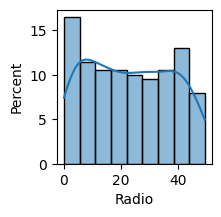

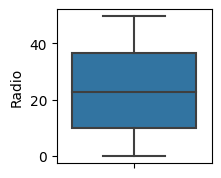

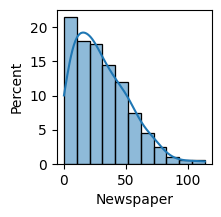

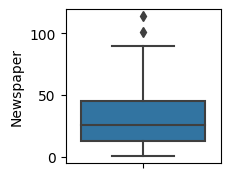

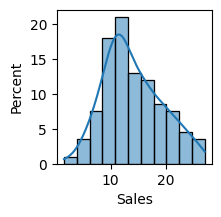

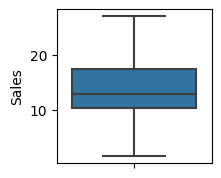

In [25]:
for i in df.columns:
    plt.figure(figsize=(2,2))
    sns.histplot(data=df,x=i,stat="percent",kde=True)
    plt.show()
    
    plt.figure(figsize=(2,2))
    sns.boxplot(data=df,y=i)
    plt.show()

### Feature Selection

In [45]:
from sklearn.feature_selection import f_classif, SelectKBest

# Example (F-test):
F, pvals = f_classif(df.drop("Sales", axis=1), df["Sales"])
selected_features = df.drop("Sales", axis=1).columns[pvals <= 0.05]
selected_features

Index(['TV', 'Radio'], dtype='object')

#### So newspaper col is discarded

In [46]:
df.drop('Newspaper',inplace=True,axis=1)

### Best Model Selection And Hyper Parameter tuning

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("Sales", axis=1), df["Sales"], test_size=0.2, random_state=42)

# Define candidate models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor

# Perform hyperparameter tuning and cross-validation
from sklearn.model_selection import GridSearchCV

models = {
    "LinearRegression": {},
    "Ridge": {"alpha": [0.1, 1, 10]},
    "Lasso": {"alpha": [0.1, 1, 10]},
    "RandomForestRegressor": {"n_estimators": [100, 200, 400], "max_depth": [3, 5, 7]},
    "GradientBoostingRegressor": {
        "n_estimators": [100, 200, 400],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.1, 0.01, 0.001],
    },
}

from sklearn.model_selection import GridSearchCV

for model_name, params in models.items():
    model = eval(model_name)()  # Use eval for demonstration, choose appropriate import
    grid_search = GridSearchCV(model, params, cv=5, scoring="neg_mean_squared_error")  # Minimize MSE
    grid_search.fit(X_train, y_train)
    # ... (store results for comparison)

    
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics (e.g., MSE, R-squared)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)







In [50]:
print(f"Best model: {best_model} with MSE: {mse:.4f} and R-squared: {r2:.4f}")

Best model: GradientBoostingRegressor() with MSE: 0.5191 and R-squared: 0.9836


<AxesSubplot:xlabel='Sales'>

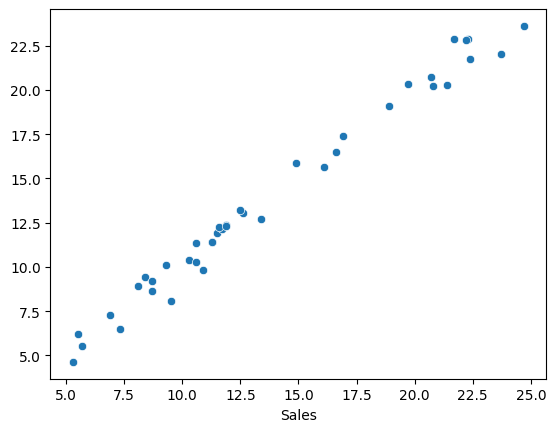

In [52]:
# Plot actual vs. predicted values, feature importances (if applicable)
sns.scatterplot(x=y_test, y=y_pred)
# ... (other visualizations and feature analysis)

## Export/Save Model file for Prediction 

In [53]:
import joblib 

## Saving model file in pkl format
joblib.dump(best_model,"model.pkl")

['model.pkl']